Importing the Required Libraries and Modules

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from  sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from scipy.stats import norm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,make_scorer,accuracy_score
from sklearn.model_selection import cross_val_score


Loading the Data

In [4]:
music_df=pd.read_csv("SpotifySongPopularityAPIExtract.csv")
music_df             

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


Data Retrival

In [5]:
row,columns=music_df.shape
print("No.of Rows = ",row)
print("No.of Columns = ",columns)
music_df.sample(10,random_state=6)

No.of Rows =  130663
No.of Columns =  17


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
101991,Jake Owen,7yWZMRVD9g94LC4gnaw9zg,In It,0.758000,0.5990,189227,0.578,0.000025,2,0.0824,-7.334,1,0.0288,109.988,4,0.3720,60
71471,Sworr.,68DkNcWx9gTWSE5VdqsrgJ,"Fluorescence, Pt. 2",0.882000,0.6360,361573,0.517,0.007340,10,0.1010,-9.318,0,0.0438,162.560,4,0.0924,31
117553,K CAMP,4PZ3jLUFMIOqDOPKYpA2BK,Body A Canvas,0.495000,0.9500,190240,0.343,0.000000,1,0.0805,-9.418,0,0.5080,124.051,4,0.5640,48
10498,lilwaterbed,4XjnPenmHQNOhRe1UXHtdB,paypal,0.012700,0.5840,159206,0.649,0.045000,7,0.2890,-12.912,1,0.4130,150.047,4,0.3750,35
125092,5 Seconds of Summer,0IDFAlR8uaj6BFQEG9dY13,Babylon - Live,0.000689,0.4610,210333,0.867,0.000000,2,0.7140,-3.667,0,0.0390,95.976,4,0.3810,51
76978,Francis,6c6nkoKXTuPltMzcyiNZOR,All I Want,0.041600,0.4670,212162,0.715,0.062400,0,0.2130,-6.316,1,0.0607,143.064,4,0.4060,0
127890,SOB X RBE,2g0TDC5vIiXo9lx3AUo2dB,Lifestyle,0.000847,0.8190,189231,0.611,0.000000,1,0.1200,-9.019,1,0.2190,105.063,4,0.3910,52
85135,G-DRAGON,3z0vAAMeHMaawFBph6cv0o,"TODAY - G-DRAGON 2017 WORLD TOUR <ACT III, M.O...",0.229000,0.6150,215853,0.934,0.000000,4,0.8630,-4.720,1,0.0887,127.027,4,0.6860,27
10968,Jonny Greenwood,75K5P7JN8XDqNWo1a8P8nf,The Tailor of Fitzrovia,0.970000,0.0841,150680,0.116,0.960000,3,0.2670,-20.679,1,0.0362,83.267,4,0.0461,37
12674,Laura Veirs,3ZTRC7EOjHyXX5Fk6wUAsB,The Meadow,0.980000,0.3840,162499,0.200,0.012300,9,0.1760,-12.492,0,0.0423,138.120,5,0.1460,16


Descriptive Analysis

In [6]:
# Checking of Missing values 
print("Missing values:-\n",music_df.isnull().sum()) 
# It contains only one missing values

Missing values:-
 artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64


In [7]:
'''
track_name consists one Missing value due to the less in number,
removing that missing value from the dataset
'''
print("Missing Value")
music_df[music_df['track_name'].isnull()]

Missing Value


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
54836,VELVETEARS,2vPmLy7QuLoFfEumm6vAbV,NaN,0.418,0.694,148532,0.407,0.000137,5,0.0785,-14.235,0,0.0332,90.023,4,0.151,24


In [8]:
# Droping the Particular Null value from the Dataset
music_df.drop(54836,inplace=True)

In [9]:
print("Missing values:-\n",music_df.isnull().sum()) 

Missing values:-
 artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64


As the track_name and artist_name consists of word with space in it so to make it proper spaces and other misshandled values are filled with '_' 

In [10]:
''' 
In pandas, the str accessor is used
to apply string methods to each element in a Series.
'''
music_df[['artist_name', 'track_name']] = music_df[['artist_name', 'track_name']].apply(lambda x: x.str.lower().str.replace(' ', '_'))


Finding the Duplicated Values

In [11]:
music_df.duplicated(subset='track_id').sum()

337

In [12]:
''' Track_id should be uniques and there are 337 duplicated 
track_id which is due to incorrect entries'''
music_df.drop_duplicates(subset='track_id',keep='first',inplace=True)

In [13]:
# Checking of duplicate values
music_df.duplicated(subset='track_id').sum()

0

In [14]:
# Checking for the overall duplicates or row with it's identical present in the dataset
music_df.duplicated().sum()
# No duplicated rows are present

0

Feature Engineering

In [15]:
music_df.shape

(130325, 17)

In [16]:
'''
 We can see that track_name and artist_name are categorical variables
 lets see the uniqueness of the features
'''
print("The uniqueness value for the track_name  ",music_df['track_name'].nunique()/music_df['track_name'].count()*100,"%")
print("The uniqueness value for the artist_name  ",music_df['artist_name'].nunique()/music_df['artist_name'].count()*100,'%')


The uniqueness value for the track_name   81.8860540955304 %
The uniqueness value for the artist_name   26.468444273930558 %


In [17]:
''' 
We can see that track_name as it refers to the song name Should be unique but 
here the uniqueness is 81% so which states that ther're some duplicates 
present in the column of track_name,so let's remove the duplicates and 
let's check the uniqueness.
'''
music_df.drop_duplicates(subset='track_name',keep='first',inplace=True)
print("The uniqueness value for the track_name  ",music_df['track_name'].nunique()/music_df['track_name'].count()*100,"%")
print("The uniqueness value for the artist_name  ",music_df['artist_name'].nunique()/music_df['artist_name'].count()*100,'%')

The uniqueness value for the track_name   100.0 %
The uniqueness value for the artist_name   27.787252384789817 %


In [18]:
music_df.shape

(106718, 17)

In [19]:
''' 
So we can use the artist_name as Categorical value and we can use Label Encoding 
to convert the categorical features into the numerical feature.
'''
label_encoder=LabelEncoder()
music_df['label_encoded']=label_encoder.fit_transform(music_df[['artist_name']])
music_df['label_encoded']


c:\Users\Mageshwaran07\anaconda3\envs\Env\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0         28878
1         28878
2         21320
3          4883
4          4883
          ...  
130652     3068
130653     6163
130655     2107
130659    22797
130662     2521
Name: label_encoded, Length: 106718, dtype: int32

In [20]:
music_df[['label_encoded','artist_name']]

,label_encoded,artist_name
0,28878,yg
1,28878,yg
2,21320,r3hab
3,4883,chris_cooq
4,4883,chris_cooq
...,...,...
130652,3068,big_wild
130653,6163,dave_east
130655,2107,atreyu
130659,22797,saint_claire


In [21]:
music_df.sample(5,random_state=2)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,label_encoded
653,electric_light_orchestra,6Vk0nKSktSjHzez6u0DwbO,endless_lies,0.756000,0.506,214920,0.542,0.054,3,0.124,-9.194,1,0.0270,85.585,4,0.375,25,7984
54660,austin,2gADAu30BM7RJDXNBXt4o6,one.,0.004340,0.381,224000,0.870,0.644,11,0.505,-2.070,1,0.0567,149.965,4,0.317,1,2180
82385,kim_wilde,2P3jdia9BC4bboJvrVM17O,addicted_to_you,0.000857,0.584,224613,0.879,0.000,7,0.323,-5.873,0,0.0353,125.000,4,0.639,17,14246
15286,dylan_smith,1CCiYZ33a0NgCwnUFmi7JY,hands_up,0.002640,0.514,138760,0.954,0.775,0,0.207,-5.646,0,0.2470,127.904,4,0.499,32,7670
119080,dvbbs,2h0tRwrrfpJ2npDyPW1g0u,idwk_-_loud_luxury_remix,0.022000,0.661,174765,0.888,0.000,1,0.133,-4.918,1,0.0583,121.059,4,0.447,50,7636


Feature Selection 

<Axes: >

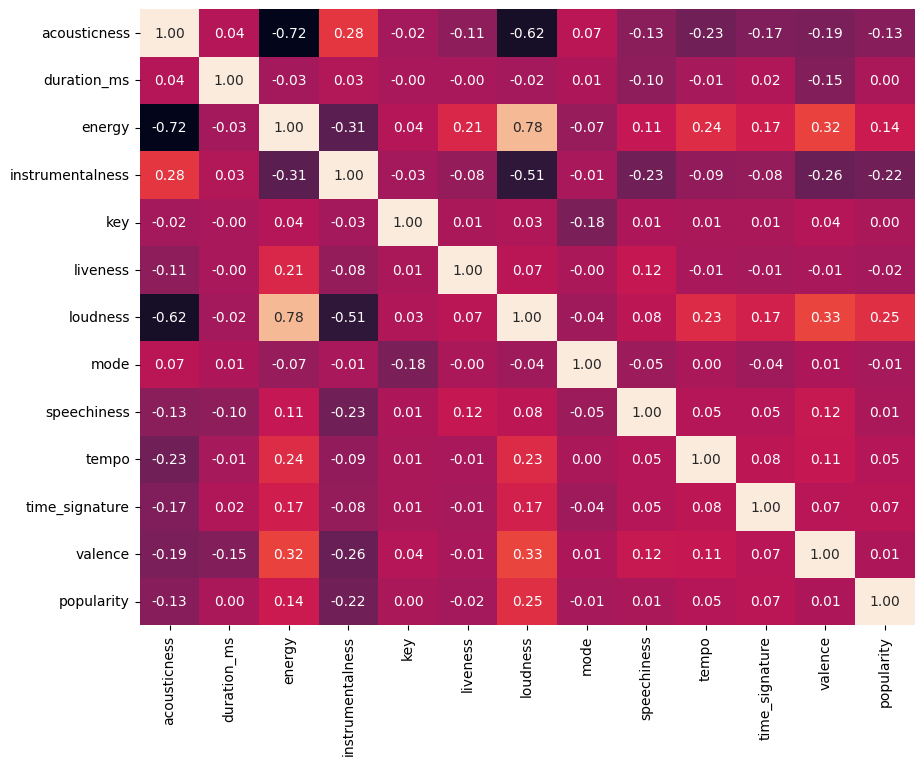

In [22]:
''' 
We Know that artist_name,track_name and track_id  are not going to be inserted
into the Machine Learning Model, So we are droping those features from the column
''' 
Selected_columns= ['acousticness', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence','popularity']
plt.figure(figsize=(10,8))
sns.heatmap(music_df[Selected_columns].corr(),annot=True,fmt='.2f',cbar=False)

<Axes: >

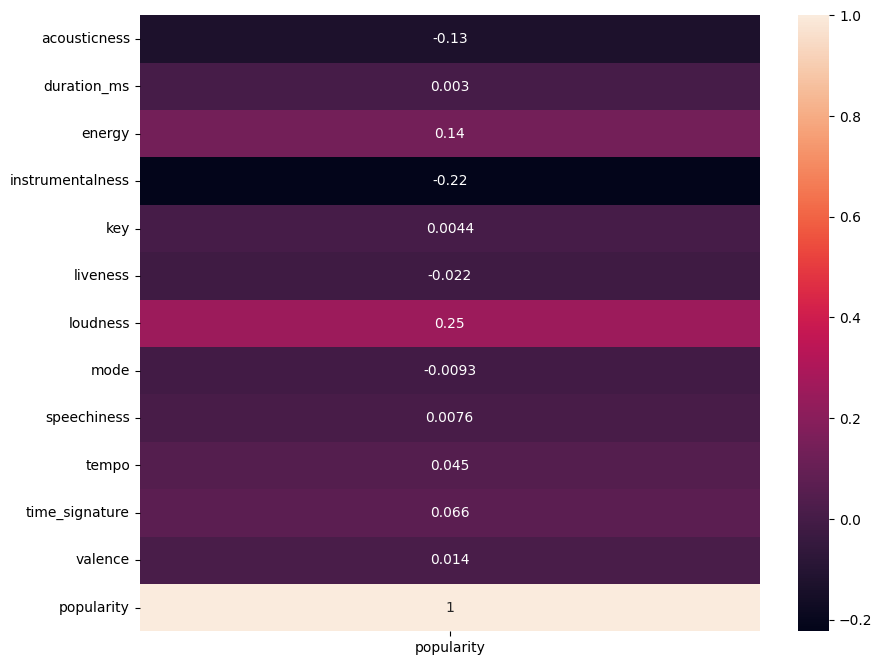

In [23]:
''' 
From the Correlation matrix we can see that acousticness , energy , loudness are corelated,
So based on their corelation with the target variable we can drop any one feature from the dataframe
'''
plt.figure(figsize=(10,8))
sns.heatmap(music_df[Selected_columns].corr()[['popularity']],annot=True)


In [24]:
''' 
From the above visualization we can see that acousticness and energy
equally corelated to popularity,So we are droping the acousticness from the
dataframe. As the acousticness feature can be easily expalained by the another
feature named energy.
'''
music_df.drop(['acousticness'],axis=1,inplace=True)

In [25]:
Selected_columns=Selected_columns= ['duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence','popularity']
music_df.describe()

,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,label_encoded
count,106718.000000,1.067180e+05,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000
mean,0.574684,2.149294e+05,0.563844,0.236224,5.233203,0.198076,-10.271238,0.612868,0.111741,119.166994,3.869900,0.443303,23.360436,14820.664527
std,0.193262,1.286936e+05,0.266303,0.367029,3.600373,0.171798,6.799162,0.487097,0.125696,30.203160,0.527633,0.263017,19.145188,8579.252150
min,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.447000,1.628400e+05,0.382000,0.000000,2.000000,0.097400,-12.331000,0.000000,0.038900,95.753750,4.000000,0.222000,6.000000,7607.000000
50%,0.597000,2.027200e+05,0.601000,0.000218,5.000000,0.125000,-8.135000,1.000000,0.055200,120.019000,4.000000,0.425000,21.000000,14455.500000
75%,0.724000,2.445870e+05,0.777000,0.539000,8.000000,0.242000,-5.735000,1.000000,0.127000,138.433750,4.000000,0.647000,36.000000,22220.000000
max,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000,29653.000000


In [26]:
''' 
As we can see that duration is in milli_second we can convert that into minutes which will be easy for the computation.
'''
music_df['duration_ms']=music_df['duration_ms']/60000

In [27]:
music_df.describe()


,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,label_encoded
count,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000,106718.000000
mean,0.574684,3.582156,0.563844,0.236224,5.233203,0.198076,-10.271238,0.612868,0.111741,119.166994,3.869900,0.443303,23.360436,14820.664527
std,0.193262,2.144893,0.266303,0.367029,3.600373,0.171798,6.799162,0.487097,0.125696,30.203160,0.527633,0.263017,19.145188,8579.252150
min,0.000000,0.053383,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.447000,2.714000,0.382000,0.000000,2.000000,0.097400,-12.331000,0.000000,0.038900,95.753750,4.000000,0.222000,6.000000,7607.000000
50%,0.597000,3.378667,0.601000,0.000218,5.000000,0.125000,-8.135000,1.000000,0.055200,120.019000,4.000000,0.425000,21.000000,14455.500000
75%,0.724000,4.076450,0.777000,0.539000,8.000000,0.242000,-5.735000,1.000000,0.127000,138.433750,4.000000,0.647000,36.000000,22220.000000
max,0.996000,93.500333,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000,29653.000000


In [28]:
''' 
1.We can see that some songs have the popularity equal to 0.
Hence those songs are removed from the dataset.
2.We can see that some songs have duration min > mean of duration min.So 
these are considered as the outliers.
'''
print("Total no.of.songs which the popularity less than 0 :- ",(music_df['popularity']==0).sum())
print("Total no.of songs where the duration is greater then 10 min",(music_df['duration_ms']>10).sum())


Total no.of.songs which the popularity less than 0 :-  15510
Total no.of songs where the duration is greater then 10 min 1018


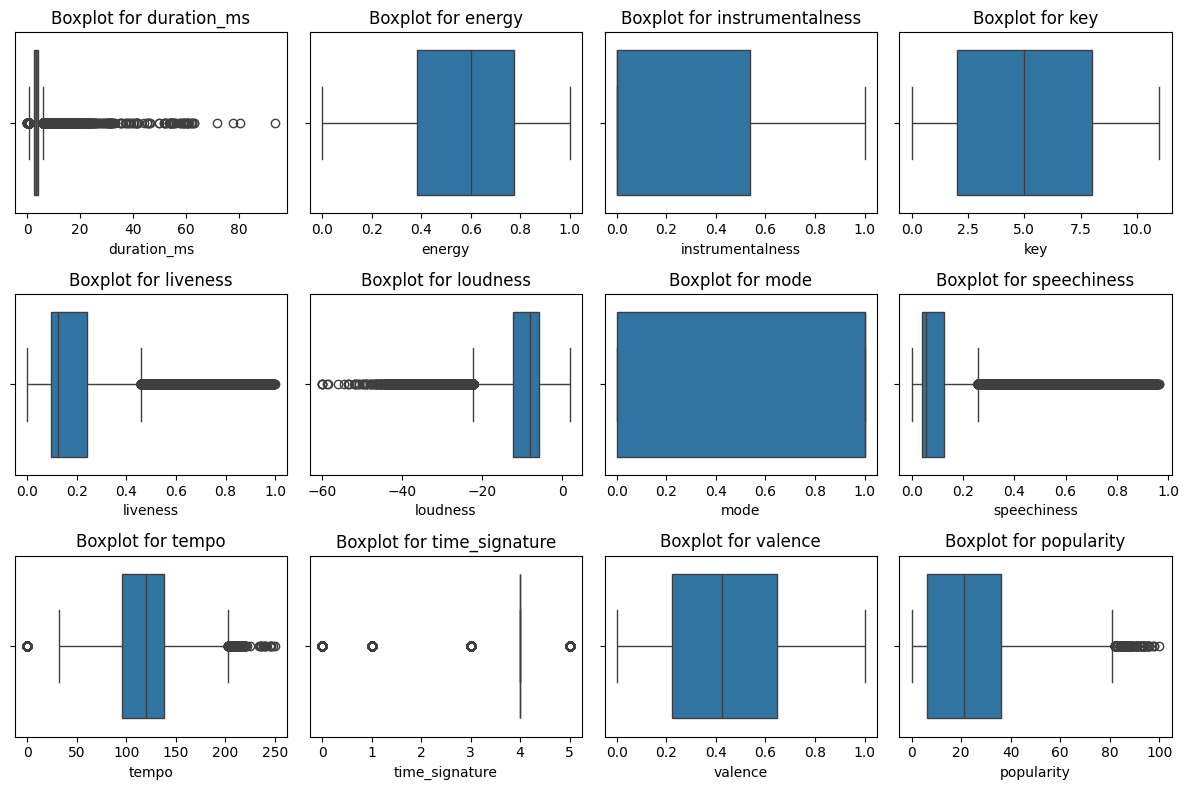

In [29]:
plt.figure(figsize=(12, 8))

# Iterate through each column and create boxplots
for i, column in enumerate(music_df[Selected_columns]):
    plt.subplot(3, 4, i+1)  
    sns.boxplot(x=music_df[column],orient='h')
    plt.title(f'Boxplot for {column}')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Filter out outliers
    dataframe_no_outliers = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

    return dataframe_no_outliers

for column in Selected_columns:
    music_df=remove_outliers(music_df,column)


In [31]:
music_df.shape

(66559, 17)

In [32]:
music_df.columns

Index(['artist_name', 'track_id', 'track_name', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity',
       'label_encoded'],
      dtype='object')

Cross Validation 

In [33]:
''' 
We can see that the total no.of data reduced from 130663 to 66559.And the 
66559 is the data we required for the model.
'''
drop_columns=['artist_name','track_name','track_id','popularity']
X=music_df.drop(drop_columns,axis=1)
y=music_df['popularity']


In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=7,test_size=0.2)

In [35]:
model=XGBRegressor(learning_rate=1.5)
model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
model.score(x_train,y_train)

0.4558072090148926

In [37]:
model = XGBRegressor(
                                    learning_rate=1.5, n_estimators=3460,
                                     max_depth=7, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006, random_state=42
                    )
model.fit(X,y)

c:\Users\Mageshwaran07\anaconda3\envs\Env\lib\site-packages\xgboost\core.py:160: UserWarning: [19:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3460, n_jobs=None, nthread=-1,
             num_parallel_tree=None, ...)

learnin_rate -> A parameter that controls the step size during the gradient boosting process.

n_estimators -> The number of boosting rounds (trees) to be run. It represents the number of decision trees added to the model.

Bagging      -> It's the process usualy performed to avoid overfiting of the tree.

                * Split the datasets with multiple Bootstrap samples

                    Bootstrap Samples--> Randomly selecting the samples from the dataset with replacements

                * Create Desicion tree for every Bootstrap samples 

                * Majority vote method is used among the collection of the data point to determine the output.

                

In [38]:
print("Accuracy on Training Data")
model.score(x_train,y_train)

Accuracy on Training Data


0.890241265296936

In [39]:
print("Accuracy on Unseen Data")
model.score(x_test,y_test)

Accuracy on Unseen Data


0.8916612267494202